In [14]:
%%pyspark
df = spark.read.load('abfss://files@datalakehdryxnj.dfs.core.windows.net/sales/orders/2019.csv', format='csv'
## If header exists uncomment line below
##, header=True
)
display(df.limit(10))

StatementMeta(sparkhdryxnj, 5, 15, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 76c87369-694a-407b-9560-5208eb24bc74)

In [15]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df = spark.read.load(
    'abfss://files@datalakehdryxnj.dfs.core.windows.net/sales/orders/*.csv',
    format='csv',
    schema=orderSchema
)


StatementMeta(sparkhdryxnj, 5, 16, Finished, Available, Finished)

In [16]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()
display(productSales)

StatementMeta(sparkhdryxnj, 5, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 8acea9af-488d-4a1b-964b-db2587b04737)

In [17]:
yearlySales = df.select(year("OrderDate").alias("Year")).groupBy("Year").count().orderBy("Year")
display(yearlySales)

StatementMeta(sparkhdryxnj, 5, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, a1fd39f0-cdb4-4197-b655-d5e6eca548ff)

In [18]:
df.createOrReplaceTempView("salesorders")

spark_df = spark.sql("SELECT * FROM salesorders")
display(spark_df)

StatementMeta(sparkhdryxnj, 5, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 02e26eba-9014-45e9-a091-2e187ca0574e)

In [19]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;


StatementMeta(sparkhdryxnj, 5, 20, Finished, Available, Finished)

<Spark SQL result set with 3 rows and 2 fields>

In [20]:
%%sql
SELECT * FROM salesorders

StatementMeta(sparkhdryxnj, 5, 21, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 9 fields>

In [21]:
sqlQuery = """
SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY CAST(YEAR(OrderDate) AS CHAR(4))
ORDER BY OrderYear
"""

df_spark = spark.sql(sqlQuery)
df_spark.show()


StatementMeta(sparkhdryxnj, 5, 22, Finished, Available, Finished)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(sparkhdryxnj, 5, 23, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

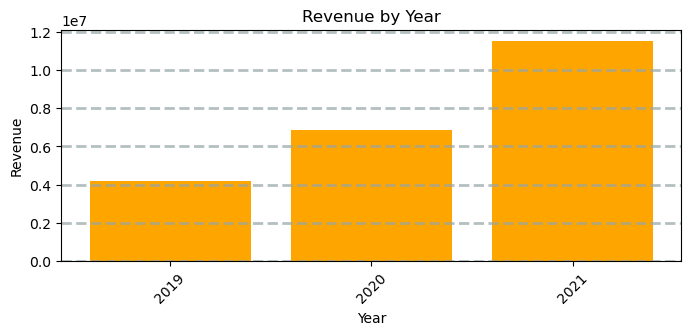

In [22]:
plt.clf()

fig = plt.figure(figsize=(8,3))

plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

StatementMeta(sparkhdryxnj, 5, 24, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

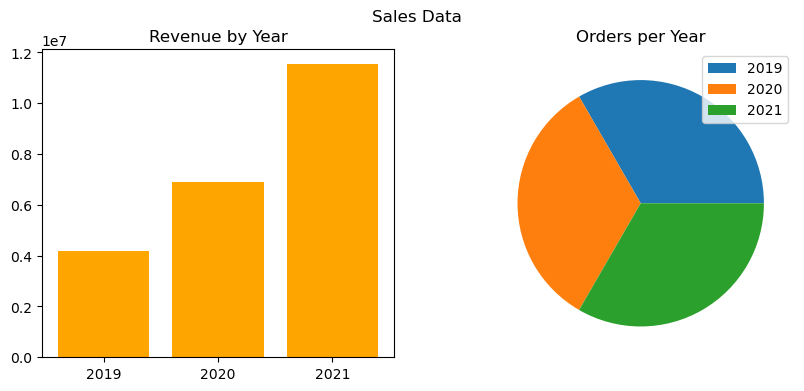

In [23]:
plt.clf()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())

fig.suptitle('Sales Data')

plt.show()
